<a href="https://colab.research.google.com/github/Renan-Domingues/ml-2024/blob/main/Petr4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I'm training a NN with TensorFlow to predict the stocks from petr4 (Petrobras).

### The goal is to analyse the parameters and predict if the next day the prices will rise or fall


In [ ]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split



/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


## Preparing the data

In [ ]:
# Definindo o ticker da Petrobras
ticker = "PETR4.SA"  # O ".SA" indica que é da Bolsa de Valores do Brasil

# Obtendo a data de hoje e a data há 360 dias atrás
hoje = datetime.today().strftime('%Y-%m-%d')
um_ano_atras = (datetime.today() - timedelta(days=360)).strftime('%Y-%m-%d')

# Buscando os dados da Petrobras na Yahoo Finance
dados_petrobras = yf.download(ticker, start=um_ano_atras, end=hoje)

# Filtrando os dados necessários (abertura, fechamento, máxima, mínima e ajuste)
petr4 = dados_petrobras


[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Exebir dados
print(petr4.tail(5))

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2024-02-09  42.139999  42.330002  41.299999  41.299999  41.299999  30388000
2024-02-14  41.099998  41.400002  40.860001  40.990002  40.990002  18315300
2024-02-15  41.009998  42.299999  40.849998  42.299999  42.299999  33246400
2024-02-16  42.090000  42.889999  42.060001  42.689999  42.689999  37268900
2024-02-19  42.759998  42.939999  42.560001  42.900002  42.900002  12826700


In [ ]:
# Printing the name of my columns
print(petr4.columns)

# Printing two of my columns by the name
print(petr4[['Open', 'Adj Close']].tail(5))

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
                 Open  Adj Close
Date                            
2024-02-09  42.139999  41.299999
2024-02-14  41.099998  40.990002
2024-02-15  41.009998  42.299999
2024-02-16  42.090000  42.689999
2024-02-19  42.759998  42.900002


In [ ]:
x_datas = petr4.index
y_datas_1 = tf.constant(petr4['Open'])
y_datas_2 = tf.constant(petr4['Close'])

x_datas[:5], y_datas_1[:5], y_datas_2[:5]

(DatetimeIndex(['2023-02-27', '2023-02-28', '2023-03-01', '2023-03-02',
                '2023-03-03'],
               dtype='datetime64[ns]', name='Date', freq=None),
 <tf.Tensor: shape=(5,), dtype=float64, numpy=array([25.84000015, 26.20999908, 25.30999947, 25.42000008, 24.82999992])>,
 <tf.Tensor: shape=(5,), dtype=float64, numpy=array([26.14999962, 25.23999977, 25.29999924, 24.63999939, 25.70000076])>)

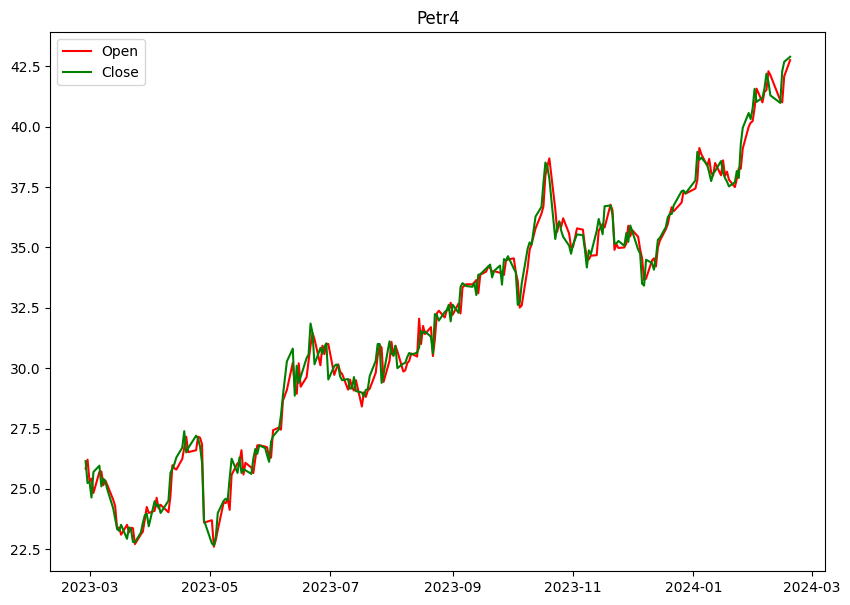

In [ ]:
# Visualization

plt.figure(figsize=(10,7))

plt.plot(x_datas, y_datas_1, c='r', label='Open')
plt.plot(x_datas, y_datas_2, c='g', label='Close')


plt.title('Petr4')
plt.legend()
plt.show()


## Creating the Training and Testing and normalizing the data


In [ ]:
# Creating the gain or loss column

petr4['Gain/Loss'] = tf.where(petr4['Close'] > petr4['Open'], 1,0)

print(petr4.tail(15))


                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2024-01-26  39.099998  40.090000  38.910000  39.959999  39.959999  41378200   
2024-01-29  40.000000  40.590000  39.830002  40.570000  40.570000  30547500   
2024-01-30  40.169998  40.740002  40.049999  40.320000  40.320000  34829000   
2024-01-31  40.230000  41.240002  40.180000  40.759998  40.759998  57978900   
2024-02-01  40.779999  41.880001  40.669998  41.570000  41.570000  61629200   
2024-02-02  41.580002  41.779999  41.020000  41.029999  41.029999  36485600   
2024-02-05  41.009998  41.680000  40.930000  41.209999  41.209999  27703000   
2024-02-06  41.450001  42.349998  41.270000  41.590000  41.590000  35474600   
2024-02-07  41.520000  42.200001  41.419998  42.200001  42.200001  30648100   
2024-02-08  42.299999  42.450001  41.860001  41.860001  41.860001  25589100   
2024-02-09  42.139999  42.330002  41.299999  41.2999

In [ ]:
# Creating Features and Labels

X = petr4[['Open', 'Close', 'High', 'Low', 'Adj Close', 'Volume']]
y = petr4['Gain/Loss']

print(X.tail(15))
print(y.tail(15) == petr4['Gain/Loss'].tail(15))

                 Open      Close       High        Low  Adj Close    Volume
Date                                                                       
2024-01-26  39.099998  39.959999  40.090000  38.910000  39.959999  41378200
2024-01-29  40.000000  40.570000  40.590000  39.830002  40.570000  30547500
2024-01-30  40.169998  40.320000  40.740002  40.049999  40.320000  34829000
2024-01-31  40.230000  40.759998  41.240002  40.180000  40.759998  57978900
2024-02-01  40.779999  41.570000  41.880001  40.669998  41.570000  61629200
2024-02-02  41.580002  41.029999  41.779999  41.020000  41.029999  36485600
2024-02-05  41.009998  41.209999  41.680000  40.930000  41.209999  27703000
2024-02-06  41.450001  41.590000  42.349998  41.270000  41.590000  35474600
2024-02-07  41.520000  42.200001  42.200001  41.419998  42.200001  30648100
2024-02-08  42.299999  41.860001  42.450001  41.860001  41.860001  25589100
2024-02-09  42.139999  41.299999  42.330002  41.299999  41.299999  30388000
2024-02-14  

In [ ]:
X.shape, y.shape

((243, 6), (243,))

In [ ]:
# I don't normalize "y" because it's binary
X = tf.keras.utils.normalize(X)


In [ ]:
X.shape

(243, 6)

In [ ]:
# I'm excluding the first line in the variable "y" and the last line of variable "X"

X = X.iloc[:-1]
y = y.iloc[1:]

# This line is important because the goal is to predict the next day

In [ ]:
#comparing results
X.tail(5), petr4.tail(5), y.head(10), petr4['Gain/Loss'].head(10)

(                Open     Close      High       Low  Adj Close  Volume
 Date                                                                 
 2024-02-08  0.000002  0.000002  0.000002  0.000002   0.000002     1.0
 2024-02-09  0.000001  0.000001  0.000001  0.000001   0.000001     1.0
 2024-02-14  0.000002  0.000002  0.000002  0.000002   0.000002     1.0
 2024-02-15  0.000001  0.000001  0.000001  0.000001   0.000001     1.0
 2024-02-16  0.000001  0.000001  0.000001  0.000001   0.000001     1.0,
                  Open       High        Low      Close  Adj Close    Volume  \
 Date                                                                          
 2024-02-09  42.139999  42.330002  41.299999  41.299999  41.299999  30388000   
 2024-02-14  41.099998  41.400002  40.860001  40.990002  40.990002  18315300   
 2024-02-15  41.009998  42.299999  40.849998  42.299999  42.299999  33246400   
 2024-02-16  42.090000  42.889999  42.060001  42.689999  42.689999  37268900   
 2024-02-19  42.759998

In [ ]:
# Separete train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((193, 6), (193,), (49, 6), (49,))

## Making the model

In [ ]:
# Defining the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(6,)), # In the input_shape I could use (X.shape[1],)
    tf.keras.layers.Dropout(0.2), # 20% Dropout
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=140, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss: ", loss)
print("Acurracy: ", accuracy)

Epoch 1/140
7/7 [==============================] - 1s 38ms/step - loss: 5.4074 - accuracy: 0.4767 - val_loss: 9.7586 - val_accuracy: 0.3673
Epoch 2/140
7/7 [==============================] - 0s 7ms/step - loss: 5.0134 - accuracy: 0.4767 - val_loss: 3.9269 - val_accuracy: 0.3673
Epoch 3/140
7/7 [==============================] - 0s 10ms/step - loss: 4.9375 - accuracy: 0.4767 - val_loss: 2.8647 - val_accuracy: 0.3673
Epoch 4/140
7/7 [==============================] - 0s 7ms/step - loss: 4.6950 - accuracy: 0.4767 - val_loss: 2.5179 - val_accuracy: 0.3673
Epoch 5/140
7/7 [==============================] - 0s 10ms/step - loss: 4.0877 - accuracy: 0.4767 - val_loss: 2.3963 - val_accuracy: 0.3673
Epoch 6/140
7/7 [==============================] - 0s 11ms/step - loss: 3.5468 - accuracy: 0.4767 - val_loss: 2.3289 - val_accuracy: 0.3673
Epoch 7/140
7/7 [==============================] - 0s 8ms/step - loss: 3.3663 - accuracy: 0.4767 - val_loss: 2.2190 - val_accuracy: 0.3673
Epoch 8/140
7/7 [======

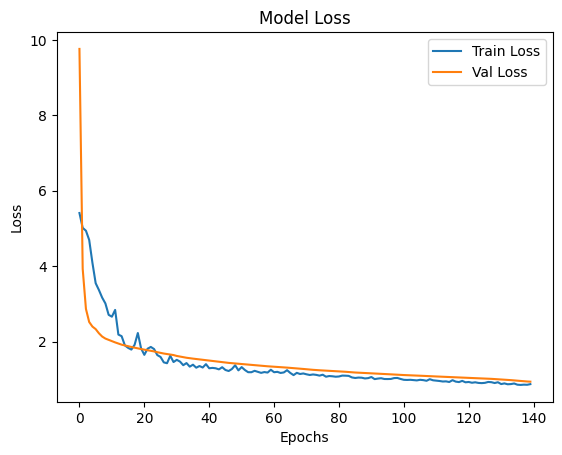

In [ ]:
# Ploting a Loss curve

plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()


## Making a prediction


In [ ]:
# Getting the latest data

recent_data = yf.download("PETR4.SA", period="1d")

print(recent_data)

[*********************100%%**********************]  1 of 1 completed

             Open   High        Low      Close  Adj Close    Volume
Date                                                               
2024-02-20  42.77  42.82  42.099998  42.310001  42.310001  23883100


In [ ]:
# Making a prediction

prediction_tensor = tf.constant(recent_data)
prediction = tf.nn.sigmoid(model.predict(prediction_tensor))

print(prediction)

1/1 [==============================] - 0s 24ms/step
tf.Tensor([[1.]], shape=(1, 1), dtype=float32)
